retrieving "D:\projects\car-license-plate-recognition\doc\problem\placas\141002\Pa140028.jpg.pkz"


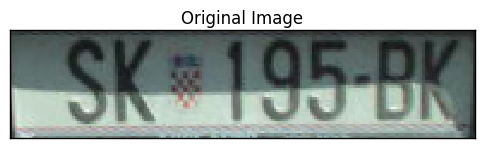

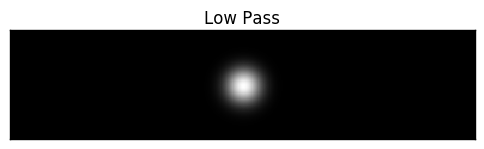

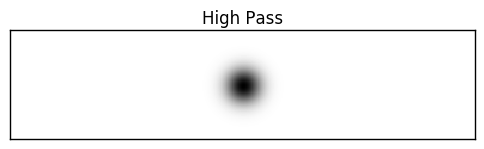

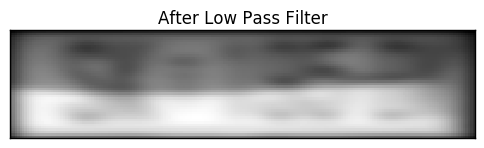

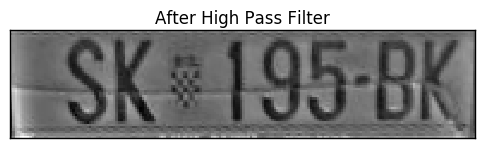

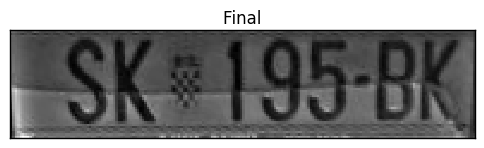

done


In [13]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
from plate import detect, segment, noise, roi, binarization
import numpy as np
import scipy.fftpack

# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140022.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140015.jpg"
img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140028.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plate points retrieving
points = []
points_path = img_path + '.pkz'
if os.path.exists(points_path):
    points = roi.retrieve(points_path, decompress=False)
else:
    print(img_path, ' points file for plate not found')
    exit(1)

# plate segmentation
plates = segment.segment_plates(img, [points])
gray = cv2.cvtColor(plates[0], cv2.COLOR_RGB2GRAY)
h, w = gray.shape
rows, cols = gray.shape

# homomorphic filtering
img = gray
imgLog = np.log1p(np.array(img, dtype="float") / 255)

M = 2*rows + 1
N = 2*cols + 1
sigma = 10
(X,Y) = np.meshgrid(np.linspace(0,N-1,N), np.linspace(0,M-1,M))
centerX = np.ceil(N/2)
centerY = np.ceil(M/2)
gaussianNumerator = (X - centerX)**2 + (Y - centerY)**2

Hlow = np.exp(-gaussianNumerator / (2*sigma*sigma))
Hhigh = 1 - Hlow

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(plates[0], interpolation='none')
plt.show()

plt.title('Low Pass'), plt.xticks([]), plt.yticks([])
plt.imshow(Hlow, interpolation='none', cmap='gray')
plt.show()

plt.title('High Pass'), plt.xticks([]), plt.yticks([])
plt.imshow(Hhigh, interpolation='none', cmap='gray')
plt.show()

HlowShift = scipy.fftpack.ifftshift(Hlow.copy())
HhighShift = scipy.fftpack.ifftshift(Hhigh.copy())

# divides la imagen en alta frecuencia y baja frecuencia
If = scipy.fftpack.fft2(imgLog.copy(), (M,N))
Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))

# plt.title('After Low Pass Filter'), plt.xticks([]), plt.yticks([])
# plt.imshow(Ioutlow[0:rows, 0:cols], interpolation='none', cmap='gray')
# plt.show()

# plt.title('After High Pass Filter'), plt.xticks([]), plt.yticks([])
# plt.imshow(Iouthigh[0:rows, 0:cols], interpolation='none', cmap='gray')
# plt.show()

# las unes con diferentes coeficientes
gamma1 = 0.3
gamma2 = 1.5
Ioutlow_gamma = gamma1*Ioutlow[0:rows,0:cols]
Iouthigh_gamma = gamma2*Iouthigh[0:rows,0:cols]
Iout = Ioutlow_gamma + Iouthigh_gamma

Ihmf = np.expm1(Iout)figsize
Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
Ihmf2 = np.array(255*Ihmf, dtype="uint8")

plt.title('After Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.imshow(Ioutlow_gamma, interpolation='none', cmap='gray')
plt.show()

plt.title('After High Pass Filter'), plt.xticks([]), plt.yticks([])
plt.imshow(Iouthigh_gamma, interpolation='none', cmap='gray')
plt.show()

plt.title('Final'), plt.xticks([]), plt.yticks([])
plt.imshow(Ihmf2, interpolation='none', cmap='gray')
plt.show()

print("done")